In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data cleaning

In [3]:
users = pd.read_csv("data/takehome_users.csv", engine='python')
users_engagement = pd.read_csv("data/takehome_user_engagement.csv", engine='python')

In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


```creation_time``` and ```last_session_creation_time``` are both time stamp data. Thus, they are converted to ```datatime``` types. The missing values in ```last_session_creation_time``` are filled with their corresponding ```creation_time```'s.

The missing values in ```invited_by_user_id``` are left alone because they represent that those users' creation are not through invitation.

In [6]:
users.creation_time = pd.to_datetime(users.creation_time)
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time, unit="s")
users.last_session_creation_time = users.last_session_creation_time.fillna(users.creation_time)

In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [9]:
users_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
users_engagement.visited.value_counts()

1    207917
Name: visited, dtype: int64

Because ```visited``` is ```1``` in all rows, ```visited``` is deleted from the engagement data.

In [12]:
users_engagement.time_stamp = pd.to_datetime(users_engagement.time_stamp)
del users_engagement["visited"]

In [13]:
users_engagement.head()

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2


In [14]:
users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


# Indentify adopted users

User whose three consecutive logins happen within 7 days are identified as adopted users.

In [15]:
adopted = np.zeros(len(users)).astype("bool")
seven_days = np.timedelta64(7 , "D")
for i in users.object_id:
    login_time_stamps = np.sort(users_engagement.time_stamp[users_engagement.user_id == i].values)
    if len(login_time_stamps) >= 3:
        adopted[i - 1] = ((login_time_stamps[2 :] - login_time_stamps[0 : -2]) <= seven_days).any()
adopted = pd.Series(adopted, name="adopted")
    
adopted   

0        False
1         True
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Name: adopted, Length: 12000, dtype: bool

# Feature analysis

## Email domain

In [16]:
email_domain = users.email.map(lambda s: s[s.index("@") + 1 :])
email_domain.name = "email_domain"

email_domain_adopt = pd.concat([email_domain, adopted], axis=1).pivot_table(index="email_domain", values="adopted", aggfunc=[len, np.sum, lambda x: np.sum(x) / len(x)])
email_domain_adopt.columns = ["total_count", "adopted_count", "adopted_rate"]
email_domain_adopt = email_domain_adopt.sort_values(["adopted_rate", "adopted_count", "total_count"], ascending=False)

email_domain_adopt_rest = email_domain_adopt[email_domain_adopt.total_count <= 10]
email_domain_adopt = email_domain_adopt[email_domain_adopt.total_count > 10]

email_domain_adopt_others = np.sum(email_domain_adopt_rest)
email_domain_adopt_others.adopted_rate = email_domain_adopt_others.adopted_count / email_domain_adopt_others.total_count
email_domain_adopt_others.name = "others"
email_domain_adopt = email_domain_adopt.append(email_domain_adopt_others)
email_domain_adopt

,total_count,adopted_count,adopted_rate
email_domain,,,
hotmail.com,1165.0,205.0,0.175966
gmail.com,3562.0,557.0,0.156373
jourrapide.com,1259.0,170.0,0.135028
gustr.com,1179.0,150.0,0.127226
cuvox.de,1202.0,144.0,0.119800
yahoo.com,2447.0,267.0,0.109113
others,1186.0,163.0,0.137437


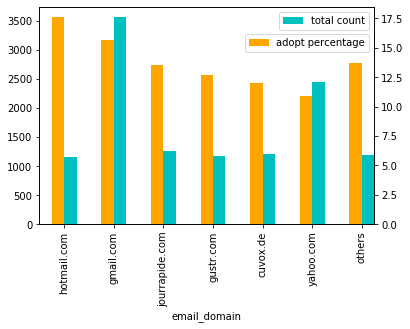

In [17]:
plt.figure()

ax1 = plt.gca()
ax2 = ax1.twinx()

email_domain_adopt.total_count.plot.bar(label="total count", color="c", position=0, width=0.25, ax=ax1)
(email_domain_adopt.adopted_rate * 100).plot.bar(label="adopt percentage", color="orange", position=1, width=0.25, ax=ax2)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

The adoption rates os users with different email domains are calculated. Email domains that are used less than 10 occurences are aggregated as ```others```. The adoption rate is different for different domains.

In [18]:
rc_table = pd.concat([(email_domain_adopt.total_count - email_domain_adopt.adopted_count), email_domain_adopt.adopted_count], axis=1)
rc_table.columns = ["nonadopted_count", "adopted_count"]
rc_table

,nonadopted_count,adopted_count
email_domain,,
hotmail.com,960.0,205.0
gmail.com,3005.0,557.0
jourrapide.com,1089.0,170.0
gustr.com,1029.0,150.0
cuvox.de,1058.0,144.0
yahoo.com,2180.0,267.0
others,1023.0,163.0


In [19]:
from scipy.stats import chi2_contingency
_, p, _, _ = chi2_contingency(rc_table)
print("P-value of chi-squared test: {}".format(p))

P-value of chi-squared test: 2.983360416428637e-08


P-value (<0.05) of chi-squared test supports this feature's potential predictability of user adoption.

In [20]:
from copy import deepcopy

email_domain_feature = deepcopy(email_domain)
for i, x in enumerate(email_domain_feature):
    if x not in email_domain_adopt.index:
        email_domain_feature[i] = "others"
        
email_domain_feature

0          yahoo.com
1          gustr.com
2          gustr.com
3          yahoo.com
4          yahoo.com
            ...     
11995      gustr.com
11996      gmail.com
11997       cuvox.de
11998         others
11999    hotmail.com
Name: email_domain, Length: 12000, dtype: object

## Creation source

In [21]:
creation_source_adopt = pd.concat([users.creation_source, adopted], axis=1).pivot_table(index="creation_source", values="adopted", aggfunc=[len, np.sum, lambda x: np.sum(x) / len(x)])
creation_source_adopt.columns = ["total_count", "adopted_count", "adopted_rate"]
creation_source_adopt = creation_source_adopt.sort_values(["adopted_rate", "adopted_count", "total_count"], ascending=False)

creation_source_adopt

,total_count,adopted_count,adopted_rate
creation_source,,,
SIGNUP_GOOGLE_AUTH,1385,239.0,0.172563
GUEST_INVITE,2163,369.0,0.170596
SIGNUP,2087,302.0,0.144705
ORG_INVITE,4254,574.0,0.134932
PERSONAL_PROJECTS,2111,172.0,0.081478


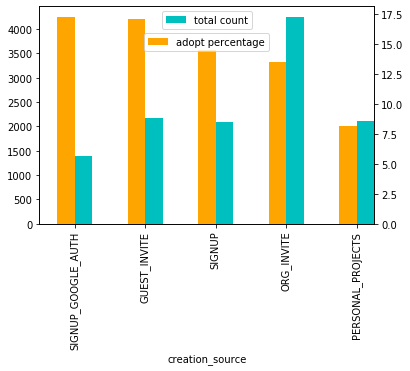

In [22]:
plt.figure()

ax1 = plt.gca()
ax2 = ax1.twinx()

creation_source_adopt.total_count.plot.bar(label="total count", color="c", position=0, width=0.25, ax=ax1)
(creation_source_adopt.adopted_rate * 100).plot.bar(label="adopt percentage", color="orange", position=1, width=0.25, ax=ax2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9))

The adoption rates os users with different creation sources are calculated. The adoption rate is different for different domains.

In [23]:
rc_table = pd.concat([(creation_source_adopt.total_count - creation_source_adopt.adopted_count), creation_source_adopt.adopted_count], axis=1)
rc_table.columns = ["nonadopted_count", "adopted_count"]
rc_table

,nonadopted_count,adopted_count
creation_source,,
SIGNUP_GOOGLE_AUTH,1146.0,239.0
GUEST_INVITE,1794.0,369.0
SIGNUP,1785.0,302.0
ORG_INVITE,3680.0,574.0
PERSONAL_PROJECTS,1939.0,172.0


In [24]:
from scipy.stats import chi2_contingency
_, p, _, _ = chi2_contingency(rc_table)
print("P-value of chi-squared test: {}".format(p))

P-value of chi-squared test: 7.884346873316259e-19


P-value (<0.05) of chi-squared test supports this feature's potential predictability of user adoption.

In [25]:
creation_source_feature = deepcopy(users.creation_source)
creation_source_feature

0              GUEST_INVITE
1                ORG_INVITE
2                ORG_INVITE
3              GUEST_INVITE
4              GUEST_INVITE
                ...        
11995            ORG_INVITE
11996    SIGNUP_GOOGLE_AUTH
11997          GUEST_INVITE
11998     PERSONAL_PROJECTS
11999                SIGNUP
Name: creation_source, Length: 12000, dtype: object

## Time passed since user creation to last login 

In [26]:
last_session_since_creation = (users.last_session_creation_time - users.creation_time)
last_session_since_creation.name = "last_session_since_first"
last_session_since_creation_adopt = pd.concat([last_session_since_creation, adopted], axis=1).pivot_table(index="adopted", aggfunc=lambda x: np.mean(x))
last_session_since_creation_adopt

,last_session_since_first
adopted,
False,3 days 16:27:17.122969
True,292 days 12:11:18.260869


The time passed since user creation till most recent login differs significantly between adopted and non-adopted users.

Text(0.5, 0, 'last_session_since_first [day]')

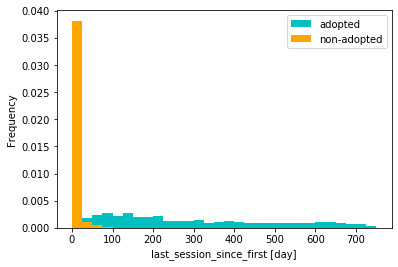

In [27]:
last_session_since_creation[adopted].dt.days.plot.hist(color="c", density=True, bins=np.linspace(0, 750, 31), label="adopted")
last_session_since_creation[~adopted].dt.days.plot.hist(color="orange", density=True, bins=np.linspace(0, 750, 31), label="non-adopted")
plt.legend()
plt.xlabel("last_session_since_first [day]")

The distribution of adopted and non-adopted users data is very different.

Text(0.5, 0, 'log(x+1) of last_session_since_first [arbitary unit]')

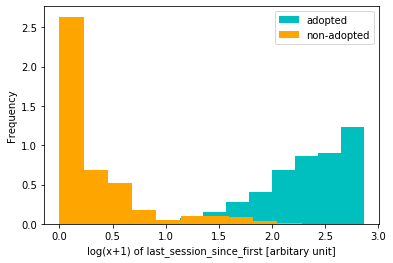

In [28]:
np.log10(last_session_since_creation.dt.days + 1)[adopted].plot.hist(color="c", density=True, label="adopted")
np.log10(last_session_since_creation.dt.days + 1)[~adopted].plot.hist(color="orange", density=True, label="non-adopted")
plt.legend()
plt.xlabel("log(x+1) of last_session_since_first [arbitary unit]")

log(x+1) transform is used to make the distributions more "normal"-like.

In [29]:
from scipy.stats import ttest_ind

x = np.log10(last_session_since_creation.dt.days + 1)[adopted].values
y = np.log10(last_session_since_creation.dt.days + 1)[~adopted].values

_, p = ttest_ind(x, y)
print("P-value of t test: {}".format(p))

P-value of t test: 0.0


P-value (<0.05) of t test supports this feature's potential predictability of user adoption.

In [30]:
last_session_since_creation_feature = last_session_since_creation.dt.days
last_session_since_creation_feature

0          0
1        136
2          0
3          1
4          5
        ... 
11995      0
11996      5
11997      0
11998      2
11999      0
Name: last_session_since_first, Length: 12000, dtype: int64

## Opted into mailing list

In [31]:
print("Adoption rate - opted into mailing list")
pd.crosstab(adopted, users.opted_in_to_mailing_list, normalize="columns")

Adoption rate - opted into mailing list


opted_in_to_mailing_list,0,1
adopted,,
False,0.863757,0.856713
True,0.136243,0.143287


The difference (<1%) of adoption rate between users that are opted and not into mailing list is insignificant.

## Enabled for marketing drip

In [32]:
print("Adoption rate - enabled for marketing drip")
pd.crosstab(adopted, users.enabled_for_marketing_drip, normalize="columns")

Adoption rate - enabled for marketing drip


enabled_for_marketing_drip,0,1
adopted,,
False,0.862951,0.856585
True,0.137049,0.143415


The difference (<1%) of adoption rate between users enabled and not into mailing list is insignificant.

## Organization ID

In [33]:
org_id_adopt = pd.concat([users.org_id, adopted], axis=1).groupby("org_id").aggregate([len, np.sum, np.mean])
org_id_adopt.columns = ["total_count", "adopted_count", "adopted_rate"]
org_id_adopt = org_id_adopt.sort_values(["adopted_rate", "adopted_count", "total_count"], ascending=False)

org_id_adopt_rest = org_id_adopt[org_id_adopt.total_count <= 10]
org_id_adopt = org_id_adopt[org_id_adopt.total_count > 10]

org_id_adopt_others = org_id_adopt_rest.sum()
org_id_adopt_others.adopted_rate = org_id_adopt_others.adopted_count / org_id_adopt_others.total_count
org_id_adopt_others.name = "others"
org_id_adopt = org_id_adopt.append(org_id_adopt_others)
org_id_adopt

,total_count,adopted_count,adopted_rate
org_id,,,
387,12.0,7.0,0.583333
235,13.0,6.0,0.461538
270,14.0,6.0,0.428571
399,13.0,5.0,0.384615
392,16.0,6.0,0.375000
...,...,...,...
329,13.0,0.0,0.000000
346,12.0,0.0,0.000000
183,11.0,0.0,0.000000


Text(0, 0.5, 'adopted percantage')

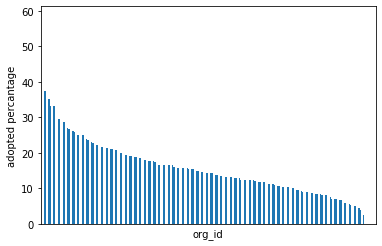

In [34]:
(org_id_adopt.adopted_rate * 100).plot.bar()
plt.xticks([])
plt.ylabel("adopted percantage")

Users from different organizations have different adoption rate. Organizations where there are less than 10 users are aggregated into ```others```.

In [35]:
org_id_feature = deepcopy(users.org_id)
for i, x in enumerate(org_id_feature):
    if x not in org_id_adopt.index:
        org_id_feature[i] = "others"
        
org_id_feature

0         11
1          1
2         94
3          1
4        193
        ... 
11995     89
11996    200
11997     83
11998      6
11999      0
Name: org_id, Length: 12000, dtype: object

## If users are invited

In [36]:
invited = ~users.invited_by_user_id.isnull()
invited.name = "invited"

print("Adoption rate - if users are invited")
pd.crosstab(adopted, invited, normalize="columns")

Adoption rate - if users are invited


invited,False,True
adopted,,
False,0.872291,0.853047
True,0.127709,0.146953


Users who sign up by invitation have higher adoption rate.

In [37]:
rc_table = pd.crosstab(invited, adopted)
rc_table

adopted,False,True
invited,,
False,4870,713
True,5474,943


In [38]:
_, p, _, _ = chi2_contingency(rc_table)
print("P-value of chi-squared test: {}".format(p))

P-value of chi-squared test: 0.0025095251588626395


P-value (<0.05) of chi-squared test supports this feature's potential predictability of user adoption.

However, this feature's encoding is absorbed other features (e.g. __If users are invited by adopted users__). Thus, it is omitted in the predictive model.

# Users whom invitation is from

In [39]:
invited_by_user_id_adopt = pd.concat([users.invited_by_user_id, adopted], axis=1)
invited_by_user_id_adopt.invited_by_user_id = invited_by_user_id_adopt.invited_by_user_id.fillna(0).astype(str)
invited_by_user_id_adopt.invited_by_user_id = invited_by_user_id_adopt.invited_by_user_id.replace("0.0", "not invited")

invited_by_user_id_adopt = invited_by_user_id_adopt.groupby("invited_by_user_id").aggregate([len, np.sum, np.mean])
invited_by_user_id_adopt.columns = ["total_count", "adopted_count", "adopted_rate"]
invited_by_user_id_adopt = invited_by_user_id_adopt.sort_values(["adopted_rate", "adopted_count", "total_count"], ascending=False)

invited_by_user_id_adopt_rest = invited_by_user_id_adopt[invited_by_user_id_adopt.total_count <= 10]
invited_by_user_id_adopt = invited_by_user_id_adopt[invited_by_user_id_adopt.total_count > 10]

invited_by_user_id_adopt_others = invited_by_user_id_adopt_rest.sum()
invited_by_user_id_adopt_others.adopted_rate =invited_by_user_id_adopt_others.adopted_count / invited_by_user_id_adopt_others.total_count
invited_by_user_id_adopt_others.name = "others"
invited_by_user_id_adopt = invited_by_user_id_adopt.append(invited_by_user_id_adopt_others)
invited_by_user_id_adopt

,total_count,adopted_count,adopted_rate
invited_by_user_id,,,
2527.0,12.0,2.0,0.166667
not invited,5583.0,713.0,0.127709
11770.0,11.0,1.0,0.090909
2308.0,11.0,1.0,0.090909
10741.0,13.0,1.0,0.076923
1525.0,11.0,0.0,0.000000
others,6359.0,938.0,0.147507


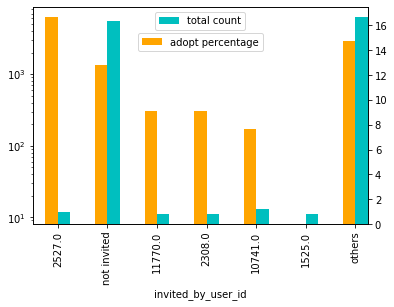

In [40]:
plt.figure()

ax1 = plt.gca()
ax2 = ax1.twinx()

invited_by_user_id_adopt.total_count.plot.bar(label="total count", color="c", position=0, width=0.25, ax=ax1)
(invited_by_user_id_adopt.adopted_rate * 100).plot.bar(label="adopt percentage", color="orange", position=1, width=0.25, ax=ax2)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9))
ax1.set_yscale('log')

In [41]:
rc_table = pd.concat([(invited_by_user_id_adopt.total_count - invited_by_user_id_adopt.adopted_count), invited_by_user_id_adopt.adopted_count], axis=1)
rc_table.columns = ["nonadopted_count", "adopted_count"]
rc_table

,nonadopted_count,adopted_count
invited_by_user_id,,
2527.0,10.0,2.0
not invited,4870.0,713.0
11770.0,10.0,1.0
2308.0,10.0,1.0
10741.0,12.0,1.0
1525.0,11.0,0.0
others,5421.0,938.0


In [42]:
_, p, _, _ = chi2_contingency(rc_table)
print("P-value of chi-squared test: {}".format(p))

P-value of chi-squared test: 0.05238057162545333


The user from whom the invitation come has some influence on the adoption rate. (Users who initiated less than 10 invitations are aggregated.) However, as most users only initiated about or less than 10 invitations, the influence should not be significant as the chi-squared test shows (p > 0.05).

# If users are invited by adopted users

In [43]:
invited_by_adopted_user = pd.merge(users.invited_by_user_id, pd.concat([users.object_id, adopted], axis=1), left_on="invited_by_user_id", right_on="object_id", how="left")["adopted"]
invited_by_adopted_user.name = "invited_by_adopted_user"
invited_by_adopted_user = invited_by_adopted_user.fillna("not invited")

print("Adoption rate - if users are invited by adopted users")
pd.crosstab(adopted, invited_by_adopted_user, normalize="columns")

Adoption rate - if users are invited by adopted users


invited_by_adopted_user,False,True,not invited
adopted,,,
False,0.866742,0.789242,0.872291
True,0.133258,0.210758,0.127709


Users invited by adopted users are more likely to become adopted.

In [44]:
rc_table = pd.crosstab(invited_by_adopted_user, adopted)
rc_table

adopted,False,True
invited_by_adopted_user,,
False,4579,704
True,895,239
not invited,4870,713


In [45]:
_, p, _, _ = chi2_contingency(rc_table)
print("P-value of chi-squared test: {}".format(p))

P-value of chi-squared test: 5.56436080629406e-13


P-value (<0.05) of chi-squared test supports this feature's potential predictability of user adoption.

In [46]:
invited_by_adopted_user_feature = invited_by_adopted_user
invited_by_adopted_user_feature

0              False
1              False
2               True
3               True
4               True
            ...     
11995          False
11996    not invited
11997          False
11998    not invited
11999    not invited
Name: invited_by_adopted_user, Length: 12000, dtype: object

# Organization which invitation is from

In [47]:
invited_by_org_id = pd.merge(users.invited_by_user_id, users[["org_id", "object_id"]], left_on="invited_by_user_id", right_on="object_id", how="left")["org_id"]
invited_by_org_id.name = "invited_by_org_id"
invited_by_org_id = invited_by_org_id.fillna(-1).astype(str).replace("-1.0", "not invited")
invited_by_org_id_adopt = pd.concat([invited_by_org_id, adopted], axis=1)

invited_by_org_id_adopt = invited_by_org_id_adopt.groupby("invited_by_org_id").aggregate([len, np.sum, np.mean])
invited_by_org_id_adopt.columns = ["total_count", "adopted_count", "adopted_rate"]
invited_by_org_id_adopt = invited_by_org_id_adopt.sort_values(["adopted_rate", "adopted_count", "total_count"], ascending=False)

invited_by_org_id_adopt_rest = invited_by_org_id_adopt[invited_by_org_id_adopt.total_count <= 10]
invited_by_org_id_adopt = invited_by_org_id_adopt[invited_by_org_id_adopt.total_count > 10]

invited_by_org_id_adopt_others = invited_by_org_id_adopt_rest.sum()
invited_by_org_id_adopt_others.adopted_rate =invited_by_org_id_adopt_others.adopted_count / invited_by_org_id_adopt_others.total_count
invited_by_org_id_adopt_others.name = "others"
invited_by_org_id_adopt = invited_by_org_id_adopt.append(org_id_adopt_others)
invited_by_org_id_adopt

,total_count,adopted_count,adopted_rate
invited_by_org_id,,,
207.0,11.0,5.0,0.454545
117.0,14.0,6.0,0.428571
177.0,12.0,5.0,0.416667
181.0,11.0,4.0,0.363636
205.0,11.0,4.0,0.363636
...,...,...,...
292.0,11.0,0.0,0.000000
299.0,11.0,0.0,0.000000
307.0,11.0,0.0,0.000000


Text(0, 0.5, 'adopted percantage')

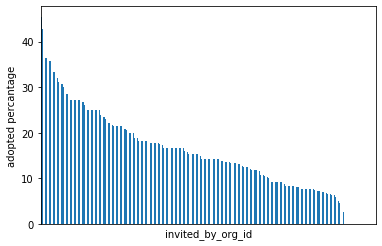

In [48]:
(invited_by_org_id_adopt.adopted_rate * 100).plot.bar()
plt.xticks([])
plt.ylabel("adopted percantage")

The organization where the user's invitation is from has influence on the adoption rate. Orginization whose users initiated less than 10 invitations are aggregated together.

In [49]:
invited_within_org = invited_by_org_id == users.org_id.astype(np.float64).astype(str)
invited_within_org[invited_by_org_id == "not invited"] = "not invited"
invited_within_org.name = "invited_within_org"

print("Adoption rate - if invitation comes intra-organizationally")
pd.crosstab(adopted, invited_within_org, normalize="columns")

Adoption rate - if invitation comes intra-organizationally


invited_within_org,True,not invited
adopted,,
False,0.853047,0.872291
True,0.146953,0.127709


However, as all invitations happen wihin the oraganizations, this feature's encoding is linearly redundant to __Organization ID__ and __If users are invited by adopted users__.

# Logistic regression model

__Email domain__, __Creation source__, __Time passed since user creation to last login__, __Organization_ID__ and __If users are invited by adopted users__ should be considered as features that predict user adoption.

In [50]:
X = pd.concat([email_domain_feature, last_session_since_creation_feature, org_id_feature, invited_by_adopted_user_feature], axis=1)
y = adopted

In [51]:
X.head()

,email_domain,last_session_since_first,org_id,invited_by_adopted_user
0,yahoo.com,0,11,False
1,gustr.com,136,1,False
2,gustr.com,0,94,True
3,yahoo.com,1,1,True
4,yahoo.com,5,193,True


In [52]:
X.last_session_since_first = np.log10(X.last_session_since_first + 1)
X = pd.get_dummies(X)

X.head()

,last_session_since_first,email_domain_cuvox.de,email_domain_gmail.com,email_domain_gustr.com,email_domain_hotmail.com,email_domain_jourrapide.com,email_domain_others,email_domain_yahoo.com,org_id_0,org_id_1,...,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_others,invited_by_adopted_user_False,invited_by_adopted_user_True,invited_by_adopted_user_not invited
0,0.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2.136721,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.301030,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.778151,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


__Time passed since user creation to last login__ is first log(x+1)-transformed. All the categorical variables are converted to one-hot encoding.

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_last_session_since_first_maen = X_train.last_session_since_first.mean()
train_last_session_since_first_sd = X_train.last_session_since_first.std()
X_train.last_session_since_first = (X_train.last_session_since_first - train_last_session_since_first_maen) / train_last_session_since_first_sd
X_test.last_session_since_first = (X_test.last_session_since_first - train_last_session_since_first_maen) / train_last_session_since_first_sd

The data are split to two parts, 20% as test set and 80% as training set. __Time passed since user creation to last login__ are further z-scored using parameters estimated from the training set.

Text(0, 0.5, 'accuracy')

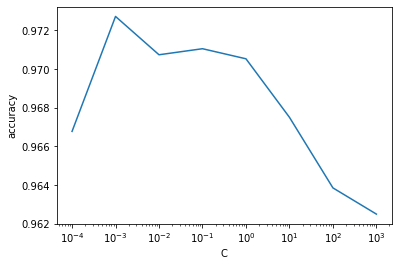

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty="l2", solver="liblinear")
C_grid = {"C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
classifier = GridSearchCV(lr, C_grid, cv=20)
classifier.fit(X_train, y_train)

scores = classifier.cv_results_["mean_test_score"]
Cs = classifier.cv_results_["param_C"].data
plt.plot(Cs, scores)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")

The regression uses L2 regularization. Cross-validation within the training set is used to determine the strength of regularization.

In [55]:
accuracy = np.mean(classifier.predict(X_test) == y_test)
print("Accuracy for the test set is {}.".format(accuracy))

Accuracy for the test set is 0.9741666666666666.
